##### Introduction
This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

<b>Studied the business understanding for the assignment</b>

##### Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
<br/>
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.
<br/>
To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

#### Steps done for preparing for case study
<hr/>
- Studied case study assignment objectives
<br/>
- Review data dictionary to understand the details on attributes

##### Import Libraries useful for the data analysis , computation and plotting graphs for the analysis
<hr/>

In [1]:
#importing libraries useful for the data anaalysis, computation, plotting graphs and analyzing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

### Read csv files for application data and previous application data into respective data frames
<hr/>

In [6]:
df_ad = pd.read_csv("application_data.csv")
df_ad.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
#Check the shape of the data frame
df_ad.shape

(307511, 122)

In [9]:
#There are many columns here to see analyze and hence overriding default options for showing number of columns:
pd.set_option('display.max_columns',None)

##### Data Inspection (routine strcutured check):

In [10]:
#List of columns and data types
df_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [13]:
#List of columns
df_ad.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

##### Data Quality and missing values 
<hr/>

##### Null Inspections

In [14]:
#Check for columns which has more null values
df_ad_nullcols =  round((df_ad.isnull().sum()/307511)*100,2) 
df_ad_nullcols

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

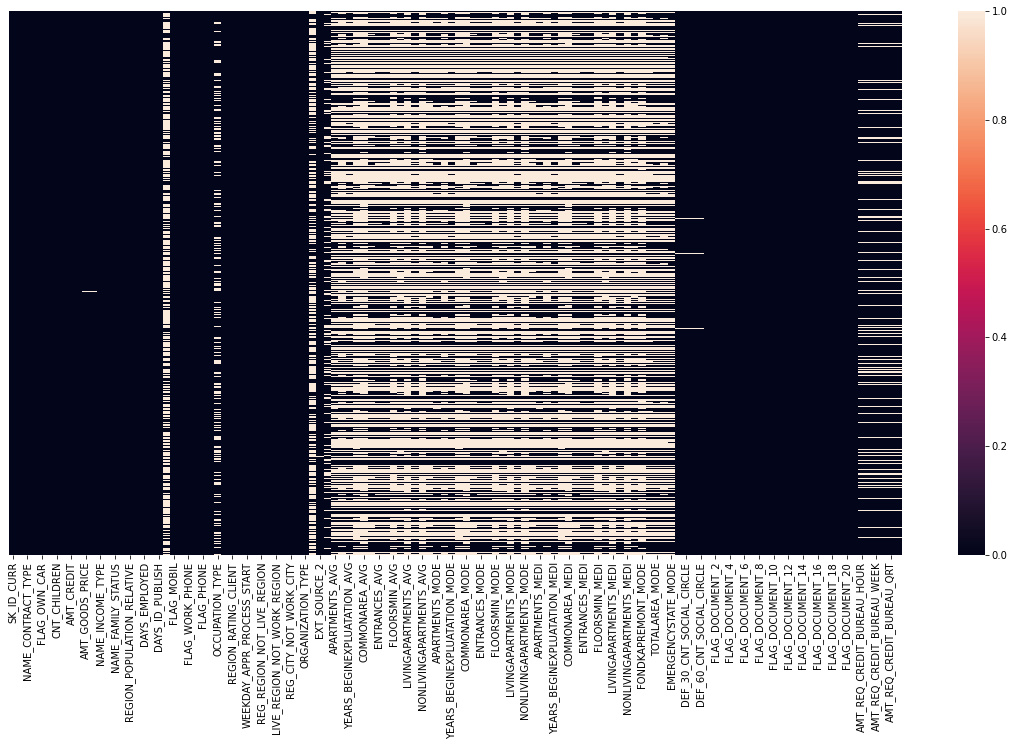

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(df_ad.isnull(),yticklabels=False)
plt.show

In [19]:
missingcols_40 = df_ad_nullcols[df_ad_nullcols>40][:] #percentage 45 is kept as threshold
missingcols_40

OWN_CAR_AGE                     65.99
EXT_SOURCE_1                    56.38
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
FLOORSMIN_MODE                  67.85
LANDAREA_MODE                   59.38
LIVINGAPARTM

In [20]:
#49 columns can be dropped which has more then 40% of values which are null values
df_missingcols_40 = pd.DataFrame({'Columns': missingcols_40.index})
df_ad.drop(df_missingcols_40.Columns,axis=1,inplace=True)

In [21]:
df_ad.shape

(307511, 73)

In [22]:
df_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [23]:
#Very attributes which has less then 13% null values
df_ad_nullcols =  round((df_ad.isnull().sum()/307511)*100,2) 
df_ad_nullcols[(df_ad_nullcols<=13) & (df_ad_nullcols > 0)][:] #percentage 13 is kept as threshold


AMT_GOODS_PRICE             0.09
NAME_TYPE_SUITE             0.42
EXT_SOURCE_2                0.21
OBS_30_CNT_SOCIAL_CIRCLE    0.33
DEF_30_CNT_SOCIAL_CIRCLE    0.33
OBS_60_CNT_SOCIAL_CIRCLE    0.33
DEF_60_CNT_SOCIAL_CIRCLE    0.33
dtype: float64

##### Checking numerical attributes if they have outliers accordingly suggest imputation techniques
<hr/>
- AMT_GOODS_PRICE (numerical)

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

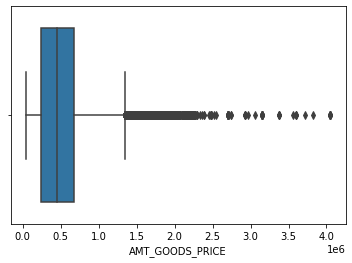

In [24]:
sns.boxplot(df_ad.AMT_GOODS_PRICE) # to view the distribution to check whether any outliers

##### 
AMT_GOODS_PRICE has outliers and that is the reason we should be using median value for imputation (since it has outliers use of mean will be biased towards outliers)

##### 
- NAME_TYPE_SUITE (Categorical)

In [25]:
df_ad.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

##### 
Suggestion for NAME_TYPE_SUITE: null values can be filled by adding other catgory  
<hr/>

##### 
- EXT_SOURCE_2 (numerical)

<AxesSubplot:xlabel='EXT_SOURCE_2'>

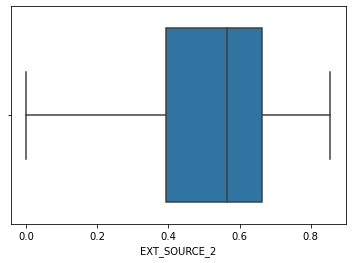

In [26]:
sns.boxplot(df_ad.EXT_SOURCE_2)  # to view the distribution to check whether any outliers

##### 
Suggestion for EXT_SOURCE_2: it does not have outliers and hence we can safely use mean to impute null values
<hr/>

##### 
- OBS_30_CNT_SOCIAL_CIRCLE (numerical)

<AxesSubplot:xlabel='OBS_30_CNT_SOCIAL_CIRCLE'>

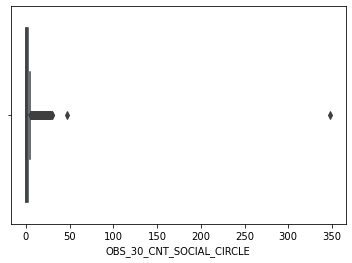

In [27]:
sns.boxplot(df_ad.OBS_30_CNT_SOCIAL_CIRCLE)  # to view the distribution to check whether any outliers

##### 
Suggestion for OBS_30_CNT_SOCIAL_CIRCLE has outliers and that is the reason we should be using median value for imputation (since it has outliers use of mean will be biased towards outliers)
<hr/>

##### 
- DEF_30_CNT_SOCIAL_CIRCLE (numerical)

<AxesSubplot:xlabel='DEF_30_CNT_SOCIAL_CIRCLE'>

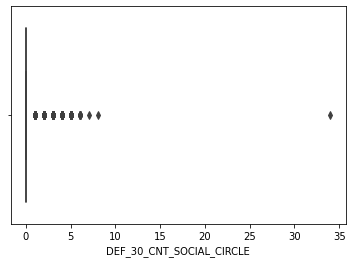

In [28]:
sns.boxplot(df_ad.DEF_30_CNT_SOCIAL_CIRCLE)  # to view the distribution to check whether any outliers

##### 
Suggestion for DEF_30_CNT_SOCIAL_CIRCLE has outliers and that is the reason we should be using median value for imputation (since it has outliers use of mean will be biased towards outliers)
<hr/>

##### 
- OBS_60_CNT_SOCIAL_CIRCLE (numerical)

<AxesSubplot:xlabel='OBS_60_CNT_SOCIAL_CIRCLE'>

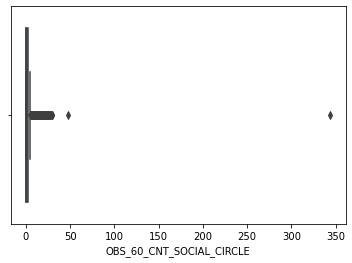

In [29]:
sns.boxplot(df_ad.OBS_60_CNT_SOCIAL_CIRCLE)  # to view the distribution to check whether any outliers

##### 
Suggestion for OBS_60_CNT_SOCIAL_CIRCLE has outliers and that is the reason we should be using median value for imputation (since it has outliers use of mean will be biased towards outliers)
<hr/>

##### 
- DEF_60_CNT_SOCIAL_CIRCLE (numerical)

<AxesSubplot:xlabel='DEF_60_CNT_SOCIAL_CIRCLE'>

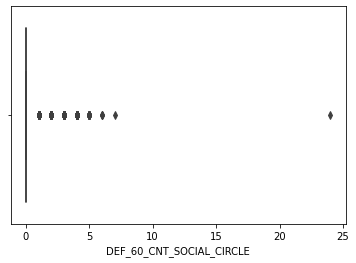

In [30]:
sns.boxplot(df_ad.DEF_60_CNT_SOCIAL_CIRCLE)  # to view the distribution to check whether any outliers

##### 
Suggestion for DEF_60_CNT_SOCIAL_CIRCLE has outliers and that is the reason we should be using median value for imputation (since it has outliers use of mean will be biased towards outliers)
<hr/>

##### Data Quality Check
<hr/>

##### Check all objective data types as listed below to verify whether values are populated appropriately
 2   NAME_CONTRACT_TYPE           307511 non-null  object <br/>
 3   CODE_GENDER                  307511 non-null  object <br/>
 4   FLAG_OWN_CAR                 307511 non-null  object <br/>
 5   FLAG_OWN_REALTY              307511 non-null  object<br/>
 11  NAME_TYPE_SUITE              306219 non-null  object <br/>
 12  NAME_INCOME_TYPE             307511 non-null  object <br/>
 13  NAME_EDUCATION_TYPE          307511 non-null  object <br/>
 14  NAME_FAMILY_STATUS           307511 non-null  object <br/>
 15  NAME_HOUSING_TYPE            307511 non-null  object<br/>
 39  ORGANIZATION_TYPE            307511 non-null  object <br/>
 <hr/>

In [31]:
df_ad.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [32]:
df_ad.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

##### 
Suggestions: Only 4 rows having XNA which is not valid and we can safely update them to F as there will not be much impact on the overall data set.<br/>
df_ad.loc[df_ad['CODE_GENDER']=='XNA','CODE_GENDER']='F'
<hr/>

In [34]:
df_ad.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [35]:
df_ad.FLAG_OWN_REALTY.value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [259]:
df_ad.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [36]:
df_ad.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [37]:
df_ad.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [38]:
df_ad.NAME_FAMILY_STATUS.value_counts() # only 2 values are having unknowns, can keep this as separate category as unknown.

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [39]:
df_ad.NAME_HOUSING_TYPE.value_counts() 

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [287]:
df_ad.ORGANIZATION_TYPE.value_counts() 

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

##### 
There are many ORGANIZATION_TYPE value almost 18% set as XNA, can be left as is instead of dropping the records, we can ignore them while analysing
<hr/>

##### Data quality for some Numerical columns need to be reviewed

In [40]:
#Fixing column values days past from employeed
df_ad.DAYS_EMPLOYED = df_ad.DAYS_EMPLOYED.abs() 
df_ad.DAYS_BIRTH = df_ad.DAYS_BIRTH.abs() 

In [41]:
df_ad.DAYS_EMPLOYED.value_counts()

365243    55374
200         156
224         152
230         151
199         151
          ...  
13961         1
11827         1
10176         1
9459          1
8694          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [42]:
#365243 value seems to be very high and hence shoudl be capped to next maximum value which make more sense.
#Get the second maximum and check if appears valid years
DAYS_EMPLOYED_Max = df_ad.DAYS_EMPLOYED.max()
DAYS_EMPLOYED_Max2 = df_ad[df_ad.DAYS_EMPLOYED!=DAYS_EMPLOYED_Max].DAYS_EMPLOYED.max()
#replace the invalid value by capping to maximum valid value
df_ad.DAYS_EMPLOYED = df_ad.DAYS_EMPLOYED.replace(DAYS_EMPLOYED_Max,DAYS_EMPLOYED_Max2)

In [43]:
# Check the shape after dropping columns
df_ad.shape

(307511, 73)

##### remove further columns which seems to be not applicable for the analysis based on objective of assignment:
<hr/>

In [44]:
# - Number of times client changed phone
# - Flag documents
df_ad = df_ad.drop(columns=['DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
'FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','EXT_SOURCE_2','EXT_SOURCE_3'])

In [46]:
###Following columns seems to be collected for checking the client details for operational purposes and do not have much significance impact on credit decision
#Looks like there are so many columns which are not relevant for analysis and hence dropping those columns which are required for our data analysis
df_ad = df_ad.drop(columns=['DAYS_REGISTRATION','DAYS_ID_PUBLISH','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START',
'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
'LIVE_CITY_NOT_WORK_CITY'])


In [47]:
df_ad.columns 
# review the remaining columns as per column description provided and verify whether thease are relevant for the analysis

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

##### Treatment of outliers

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

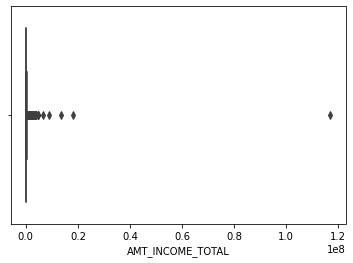

In [48]:
sns.boxplot(df_ad.AMT_INCOME_TOTAL)


##### 
Suggestions: Capping the outlier values to maxium values (to avoid skew value) - upper outliers only exists
AMT_INCOME_TOTAL_MAX = np.percentile(df_ad.AMT_INCOME_TOTAL,75) + 1.5 * (np.percentile(df_ad.AMT_INCOME_TOTAL,75) - np.percentile(df_ad.AMT_INCOME_TOTAL,25))<br/>
df_ad[df_ad.AMT_INCOME_TOTAL > AMT_INCOME_TOTAL_MAX].AMT_INCOME_TOTAL = AMT_INCOME_TOTAL_MAX

<AxesSubplot:xlabel='AMT_CREDIT'>

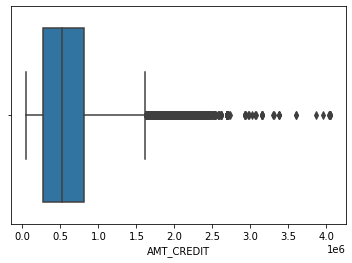

In [49]:
sns.boxplot(df_ad.AMT_CREDIT)

##### 
Suggestions: Capping the outlier values to maxium values (to avoid skew value)- upper outliers only exists
AMT_CREDIT_MAX = np.percentile(df_ad.AMT_CREDIT,75) + 1.5 * (np.percentile(df_ad.AMT_CREDIT,75) - np.percentile(df_ad.AMT_CREDIT,25))<br/>
df_ad.loc[df_ad.AMT_CREDIT > AMT_CREDIT_MAX,'AMT_CREDIT']=AMT_CREDIT_MAX

<AxesSubplot:xlabel='AMT_CREDIT'>

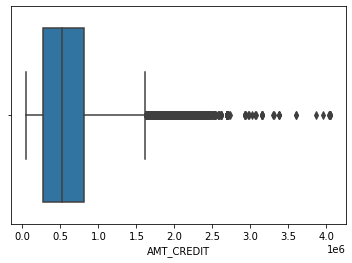

In [50]:
sns.boxplot(df_ad.AMT_CREDIT)

##### 
Capping the outlier values to maxium values (to avoid skew value) - upper outliers only exists<br/>
AMT_ANNUITY_MAX = np.percentile(df_ad.AMT_ANNUITY,75) + 1.5 * (np.percentile(df_ad.AMT_ANNUITY,75) - np.percentile(df_ad.AMT_ANNUITY,25))<br/>
df_ad.loc[df_ad.AMT_ANNUITY > AMT_ANNUITY_MAX,'AMT_ANNUITY']=AMT_ANNUITY_MAX

<AxesSubplot:xlabel='AMT_ANNUITY'>

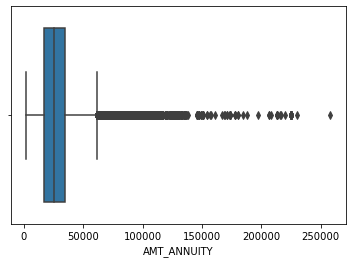

In [51]:
sns.boxplot(df_ad.AMT_ANNUITY)

<AxesSubplot:xlabel='CNT_CHILDREN'>

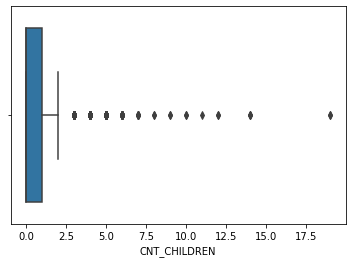

In [53]:
sns.boxplot(df_ad.CNT_CHILDREN)

##### 
Suggestions: Capping the outlier values to maxium values (to avoid skew value) - upper outliers only exists<br/>
CNT_CHILDREN_MAX = np.percentile(df_ad.CNT_CHILDREN,75) + 1.5 * (np.percentile(df_ad.CNT_CHILDREN,75) - np.percentile(df_ad.CNT_CHILDREN,25)) <br/>
df_ad.loc[df_ad.CNT_CHILDREN > CNT_CHILDREN_MAX,'CNT_CHILDREN']=CNT_CHILDREN_MAX

#####
Suggestions: Capping the outlier values to maxium values (to avoid skewed analysis) - upper outliers only exists<br/>
CNT_FAM_MEMBERS_MAX = np.percentile(df_ad.CNT_FAM_MEMBERS,75) + 1.5 * (np.percentile(df_ad.CNT_FAM_MEMBERS,75) - np.percentile(df_ad.CNT_FAM_MEMBERS,25))<br>
df_ad.loc[df_ad.CNT_FAM_MEMBERS > CNT_FAM_MEMBERS_MAX,'CNT_FAM_MEMBERS']=CNT_FAM_MEMBERS_MAX

##### 
Suggestions: Capping the outlier values to maxium values (to avoid skewed analysis) - upper outliers only exists <br/>
AMT_GOODS_PRICE_MAX = np.percentile(df_ad.AMT_GOODS_PRICE,75) + 1.5 * (np.percentile(df_ad.AMT_GOODS_PRICE,75) - np.percentile(df_ad.AMT_GOODS_PRICE,25)) <br/>
df_ad.loc[df_ad.AMT_GOODS_PRICE > AMT_GOODS_PRICE_MAX,'AMT_GOODS_PRICE']=AMT_GOODS_PRICE_MAX

#### Change numerical values to categorize them as bins for analysis

In [54]:
#Fixing column values days past from birth; convert to years
df_ad['AgeOfClient'] = (df_ad.DAYS_BIRTH / 365).round(2) 
bins = [0,30,40,50,60,100]
labels = ['0-30','30-40','40-50','50-60','60-100']
df_ad['AgeCategory'] = pd.cut(df_ad.AgeOfClient, bins=bins, labels=labels)

In [55]:
df_ad['ExperienceOfClient'] = (df_ad.DAYS_EMPLOYED / 365).round(2) 
bins = [0,10,20,30,40,50]
labels = ['0-10','10-20','20-30','30-40','40-50']
df_ad['ExpCategory'] = pd.cut(df_ad.ExperienceOfClient, bins=bins, labels=labels)

In [56]:
bins = [0,100000,200000,300000,400000,500000,10000000000]
labels = ['0-100000','100000-200000',
       '200000-300000','300000-400000','400000-500000','500000 and above']

df_ad['IncomeRange']=pd.cut(df_ad['AMT_INCOME_TOTAL'],bins,labels=labels)

In [57]:

bins = [0,200000,300000,400000,500000,600000,700000,800000,900000,1000000000]
labels = ['0-200000','200000-300000', '300000-400000','400000-500000','500000-600000','600000-700000','700000-800000',
        '800000-900000','900000 and above']

df_ad['CreditRange']=pd.cut(df_ad['AMT_CREDIT'],bins=bins,labels=labels)

#### drop columns which are not needed after binning 

In [58]:
#drop columns which are not needed now
df_ad.drop(['DAYS_BIRTH','AgeOfClient','DAYS_EMPLOYED','ExperienceOfClient'],axis=1,inplace=True)

###### Analysis of imbalance percentage:


In [59]:
df_ad.TARGET.value_counts(normalize=True)* 100 
# 8% percent of total population is succeptable to default

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

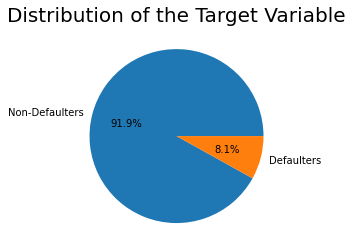

In [71]:
plt.pie(x=df_ad.TARGET.value_counts(normalize=True) * 100 ,labels=['Non-Defaulters','Defaulters'],autopct='%1.1f%%')
plt.title('Distribution of the Target Variable',fontsize=20)
plt.show()

In [75]:
#deviding the application data into two datasets for analysis
df_ad_Target0 = df_ad[df_ad.TARGET==0]
df_ad_Target1 = df_ad[df_ad.TARGET==1]

#### Univariate analysis on application data

In [326]:
df_ad.columns #remaining relevant columns for analysis after dropping columns not needed. 

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'AgeCategory', 'ExpCategory'],
      dtype='object')

In [76]:
def plotUnivariateCountPlot(col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.countplot(col, data=df_ad_Target1)
    plt.title('Distribution of defaulters per ' + col)
    plt.xticks(rotation=45)
    plt.ylabel('Number of cases')
    plt.subplot(1,2,2)
    sns.countplot(col, data=df_ad_Target0)
    plt.title('Distribution of non-defaulters per ' + col)
    plt.xticks(rotation=45)
    plt.ylabel('Number of cases')
    plt.xlabel(col)
    plt.show()

In [73]:
def plotUnivariateDistPlot(col):
    sns.distplot(df_ad_Target1[col],label='Defaulter',hist=False)
    sns.distplot(df_ad_Target0[col],label='Non-Defaulter',hist=False)
    plt.legend()
    plt.show()

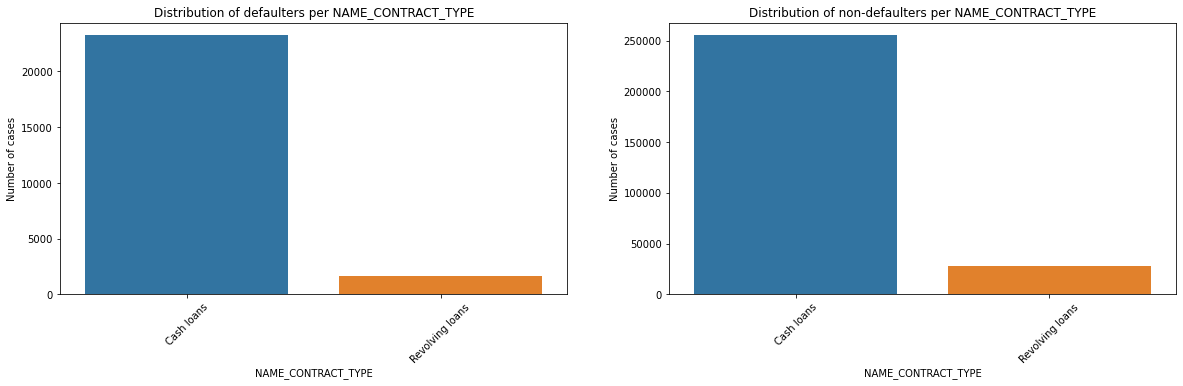

In [77]:
plotUnivariateCountPlot('NAME_CONTRACT_TYPE')

#### Inference: Number of defaulters / non-defaulters for cashloans almost same; where as in case of revolving loans number of defaulters are very less in comparision 

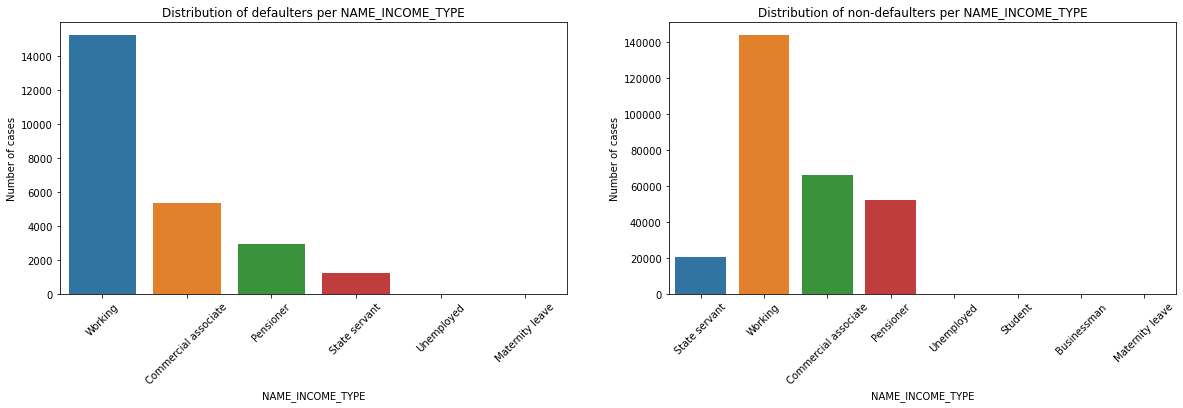

In [78]:
plotUnivariateCountPlot('NAME_INCOME_TYPE')

<function matplotlib.pyplot.show(close=None, block=None)>

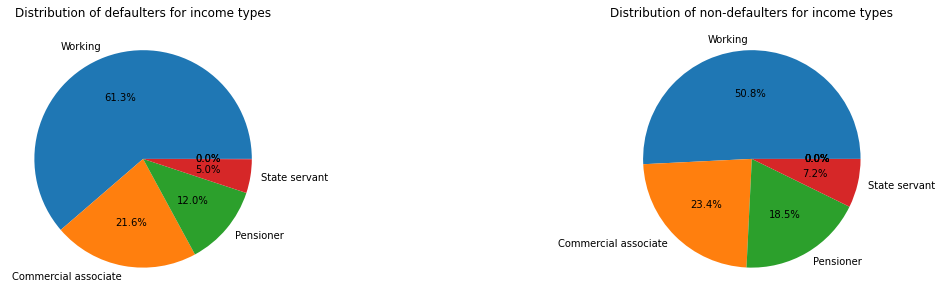

In [79]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Distribution of defaulters for income types')
plt.pie(df_ad_Target1.NAME_INCOME_TYPE.value_counts(),labels=['Working','Commercial associate','Pensioner','State servant','',''],autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.title('Distribution of non-defaulters for income types')
plt.pie(df_ad_Target0.NAME_INCOME_TYPE.value_counts(),labels=['Working','Commercial associate','Pensioner','State servant','','','',''],autopct='%1.1f%%')
plt.show

#### Inference: Working class has high defaulters , next comercial associate then pensioner and then state servent. 

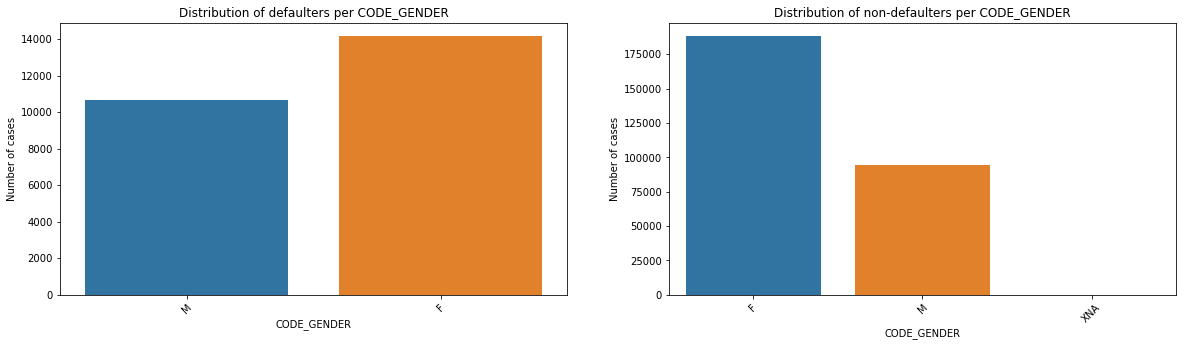

In [80]:
plotUnivariateCountPlot('CODE_GENDER')

#### Inference: There are more female applicants and defaulters are also more in female then male.

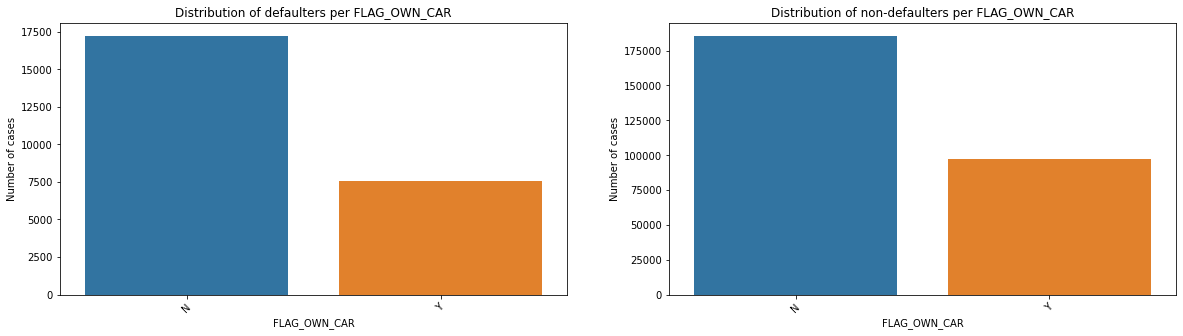

In [109]:
plotUnivariateCountPlot('FLAG_OWN_CAR')

#### Inference: owning a car does not lead to defaulter. 
some assumptions which need further reasearch: Normally people who does not have a car try to go for a loan and normally the default cases are also more. This could be becaue people who are financial stable (can afford car) does not go for loan and hence less defaults might observed.

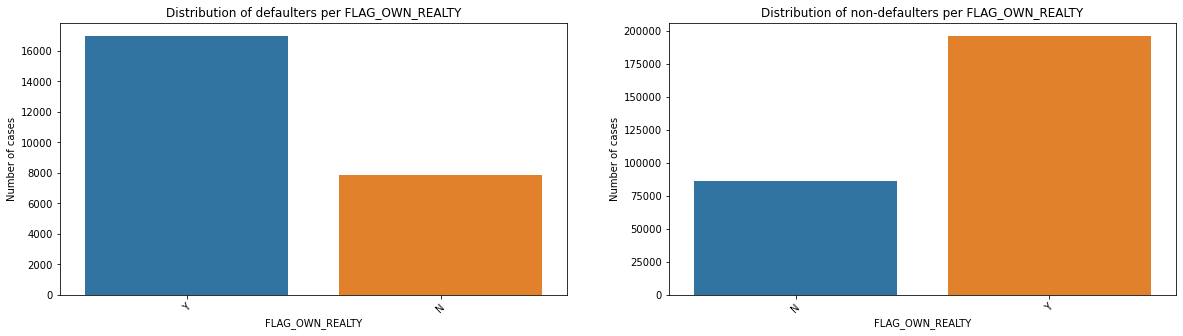

In [110]:
plotUnivariateCountPlot('FLAG_OWN_REALTY')

#### Inference: owning a house might be reason where financially lead to defaulter. 
(Further investigation needed)

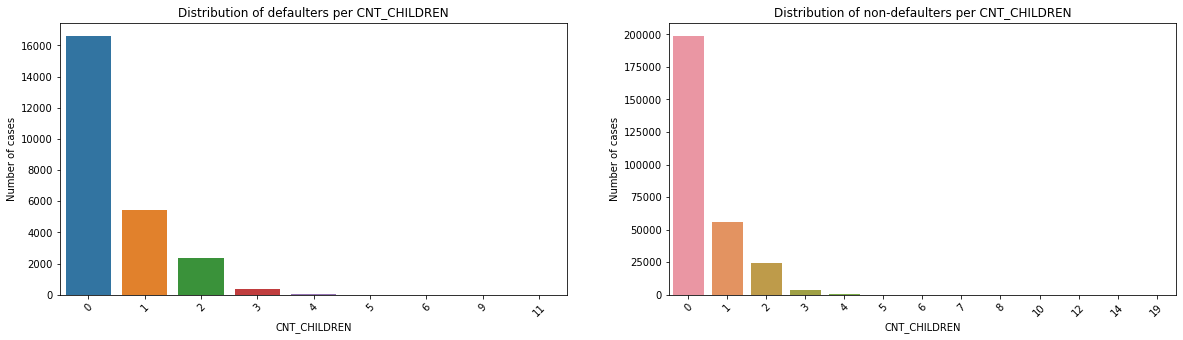

In [111]:
plotUnivariateCountPlot('CNT_CHILDREN')

#### Inference: there seems to be not having direct impact in becoming defaulter when applicants have children (age could be a factor though)
Needs further investigation: Looks like applicants who are young who does not have children go for loan and get defaulter as well.

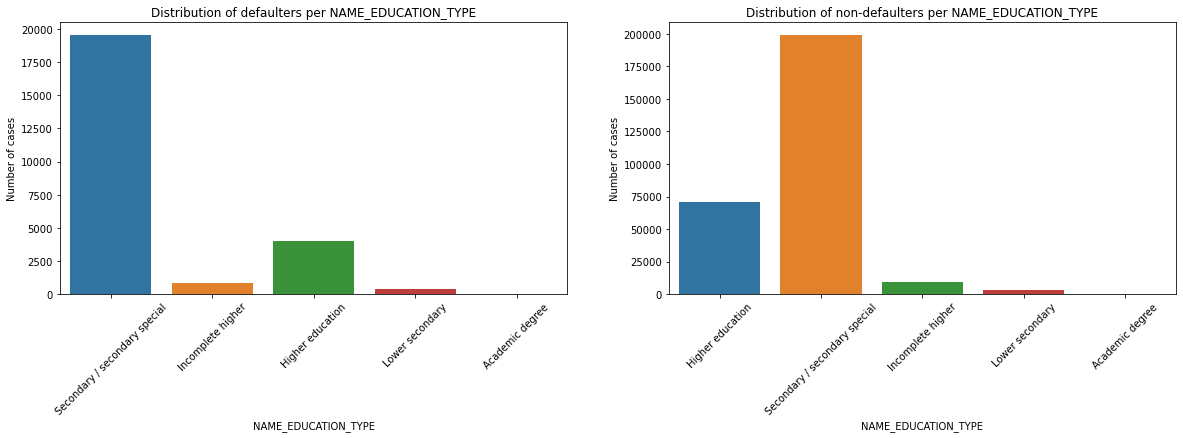

In [112]:
plotUnivariateCountPlot('NAME_EDUCATION_TYPE')

#### Inference: Higher educated applicants are well managing their finances and hene there alre less defaulters observed.

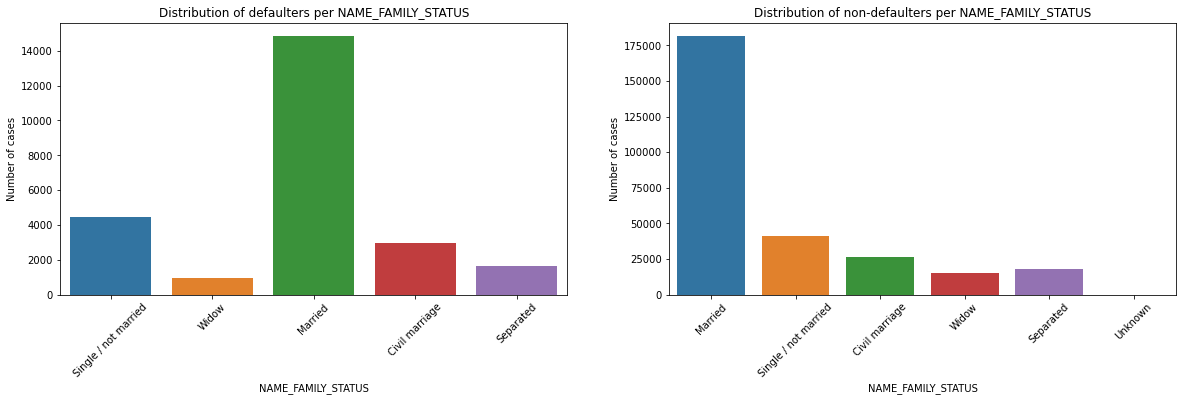

In [113]:
plotUnivariateCountPlot('NAME_FAMILY_STATUS')

##### Inference: Married man overal goes for loan and default also observed. After marriage responsibilities increases and number of applicants increases. Defaulters also proportionally increases.

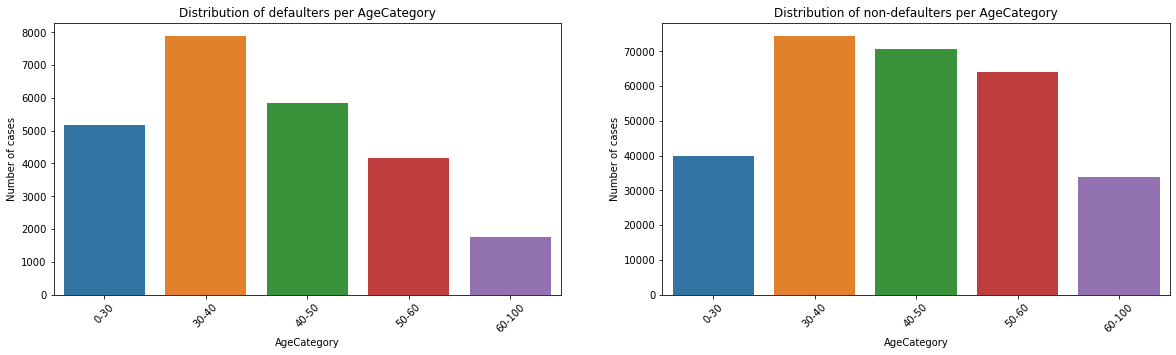

In [114]:
plotUnivariateCountPlot('AgeCategory')

#### Inference: The more senior people more then 40 years of age, they well manage their finances and less deafults in comparision to applicants who are in 30-40 age bracket.

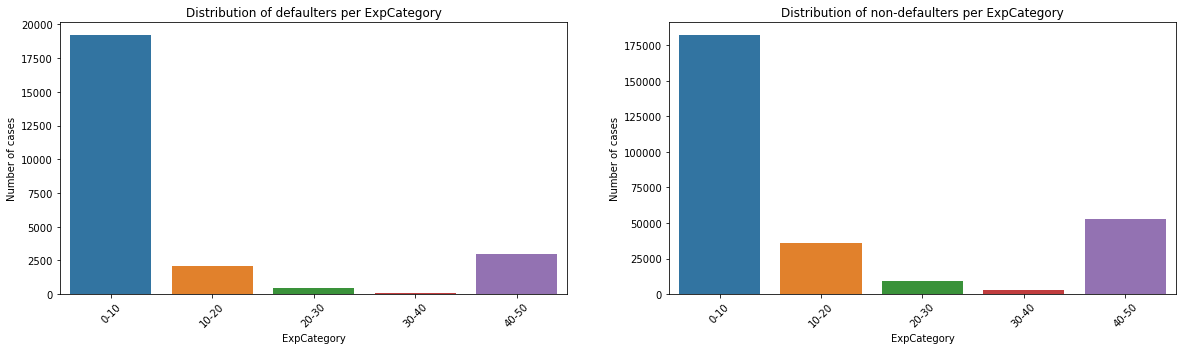

In [115]:
plotUnivariateCountPlot('ExpCategory')

#### Inference: applicants who are having more experience are less succeptable to default. 
This could be much correlated to younger age, less children and etc. We can see in bi-variate analysis.

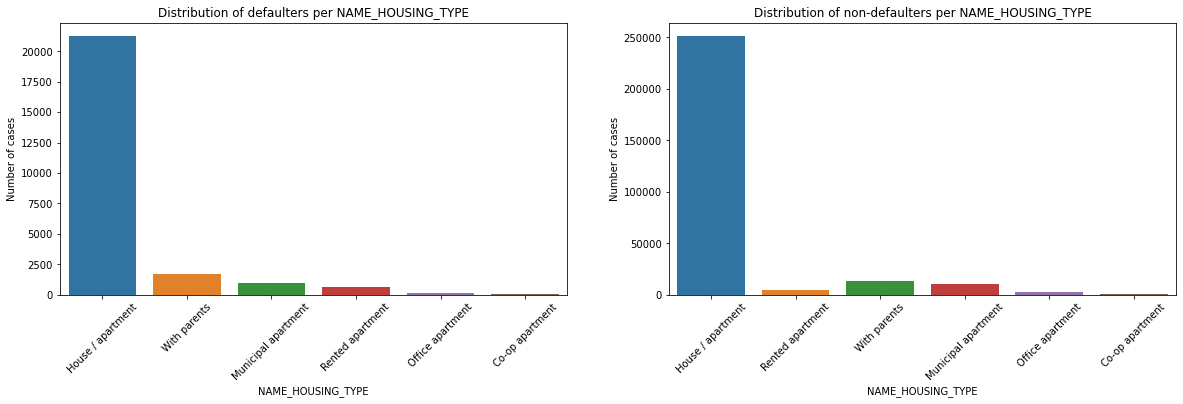

In [116]:
plotUnivariateCountPlot('NAME_HOUSING_TYPE')

##### Inference: applicants who has house they go for loan and as well as more defauters in this segment.

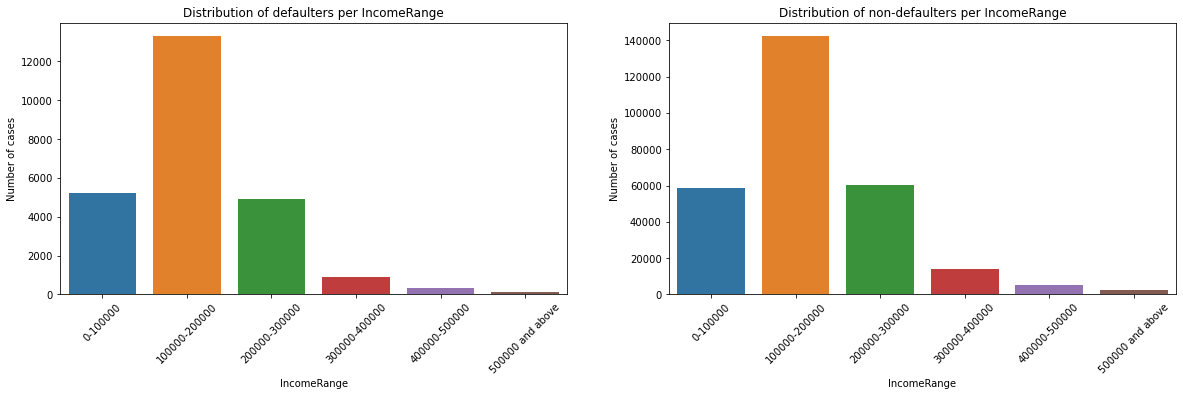

In [117]:
plotUnivariateCountPlot('IncomeRange')

##### Inference: There are ore applicants in the range of 1 lkh to 2 lakh and they have maximum defaulters.

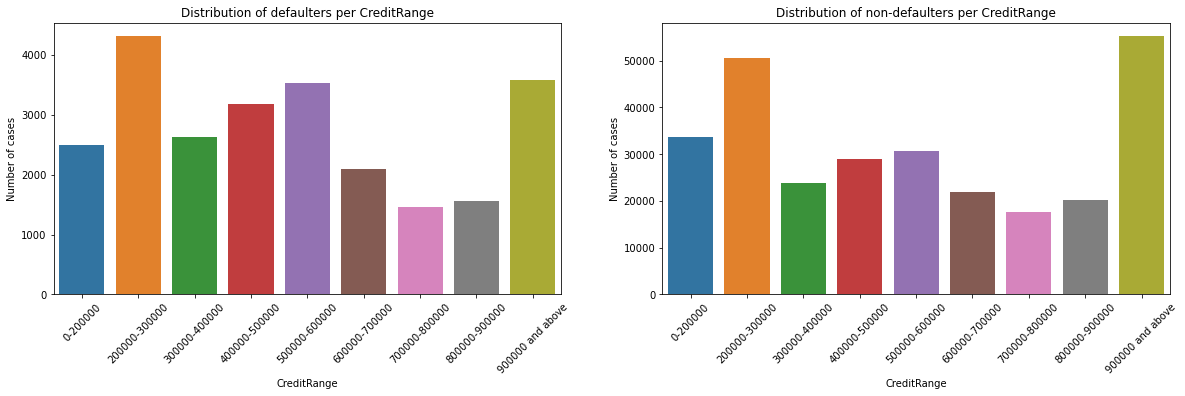

In [118]:
plotUnivariateCountPlot('CreditRange')

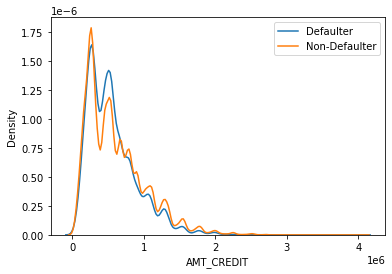

In [119]:
plotUnivariateDistPlot('AMT_CREDIT')

##### Inference: More defaulters are seen for credit range more then 9 lakhs in proportion to number applicants.

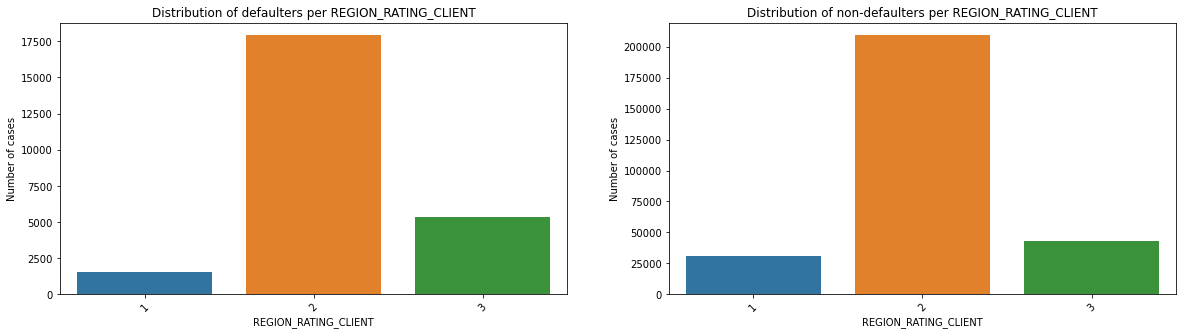

In [120]:

plotUnivariateCountPlot('REGION_RATING_CLIENT')

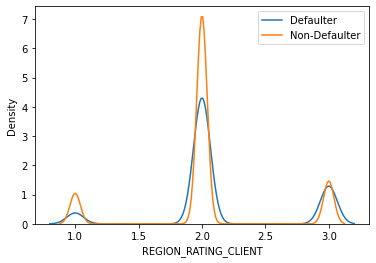

In [121]:
plotUnivariateDistPlot('REGION_RATING_CLIENT')

##### Inference: More applicants are taking loan where region rating is 2 and defaulters are also found maximum in these regions.  Also defaulters seen that the applicants with rating 1.

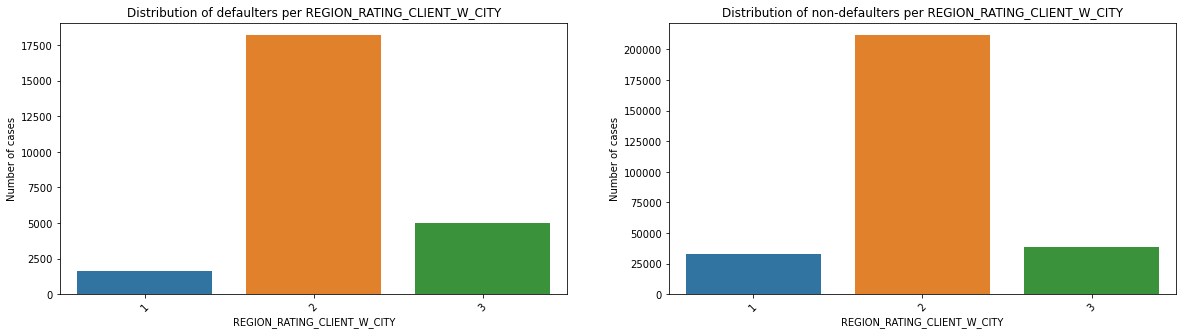

In [122]:
plotUnivariateCountPlot('REGION_RATING_CLIENT_W_CITY')

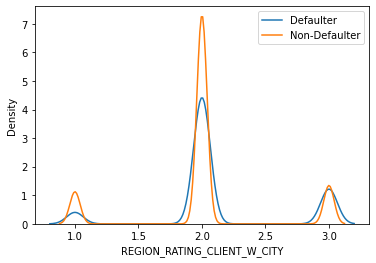

In [123]:
plotUnivariateDistPlot('REGION_RATING_CLIENT_W_CITY')

##### Inference: More applicants are taking loan where region rating (with city in account) is 2 and defaulters are also found maximum in these regions. Also defaulters seen that the applicants with rating 1.

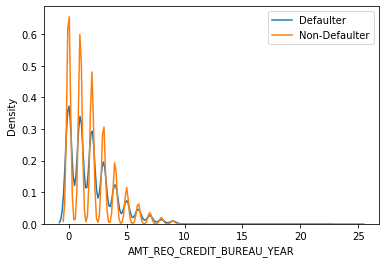

In [124]:
plotUnivariateDistPlot('AMT_REQ_CREDIT_BUREAU_YEAR')

##### Inference:
    Observed that more enquiries are being done for less applicants. 
    Need to focus on defaulted applicants where less enquiry is being done where more defaulters seen

In [125]:
df_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [126]:
def plotStripPlot(colx,coly):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title('Distribution of defaulters per ' + colx +' and ' + coly)
    sns.stripplot(x=df_ad_Target1[colx],y=df_ad_Target1[coly])
    plt.subplot(1,2,2)
    plt.title('Distribution of non-defaulters per ' + colx +' and ' + coly)
    sns.stripplot(x=df_ad_Target0[colx],y=df_ad_Target0[coly])
    plt.show()

In [127]:
def plotBoxPlot(colx,coly):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title('Distribution of defaulters per ' + colx +' and ' + coly)
    sns.boxplot(x=df_ad_Target1[colx],y=df_ad_Target1[coly])
    plt.subplot(1,2,2)
    plt.title('Distribution of non-defaulters per ' + colx +' and ' + coly)
    sns.boxplot(x=df_ad_Target0[colx],y=df_ad_Target0[coly])
    plt.show()

In [128]:
def plotBiVariateCount(colx,colhue):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title('Bivariate analysis for defaulters per ' + colx)
    sns.countplot(data = df_ad_Target1, x= colx, order=df_ad[colx].value_counts().index, hue = colhue, palette='Spectral') 
    plt.xticks(rotation=45)
    plt.subplot(1,2,2)
    sns.countplot(data = df_ad_Target0, x= colx, order=df_ad[colx].value_counts().index, hue = colhue, palette='Spectral') 
    plt.title('Bivariate analysis for non-defaulters per '+ colx)
    plt.xticks(rotation=45)
    plt.show()

In [129]:
def plotBiVariateNumericScatterPlotter(colx,coly):
    plt.figure(figsize=(10,5))
    sns.scatterplot(data = df_ad_Target1, x= colx, y=coly, color='red', label='Defaulters') 
    plt.xticks(rotation=45)
    plt.title('Bivariate analysis for '+ colx + ' vs coly')
    sns.scatterplot(data = df_ad_Target0, x= colx, y=coly,color='yellow',  label='Non-Defaulters')  
    plt.xticks(rotation=45)
    plt.show()

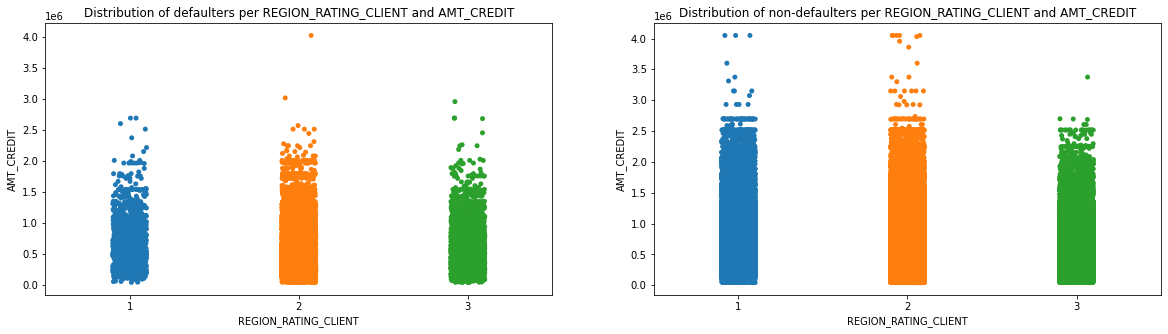

In [130]:
#sns.stripplot(x=df_ad_Target1.CODE_GENDER,y=df_ad_Target1.AMT_CREDIT)
plotStripPlot('REGION_RATING_CLIENT','AMT_CREDIT')

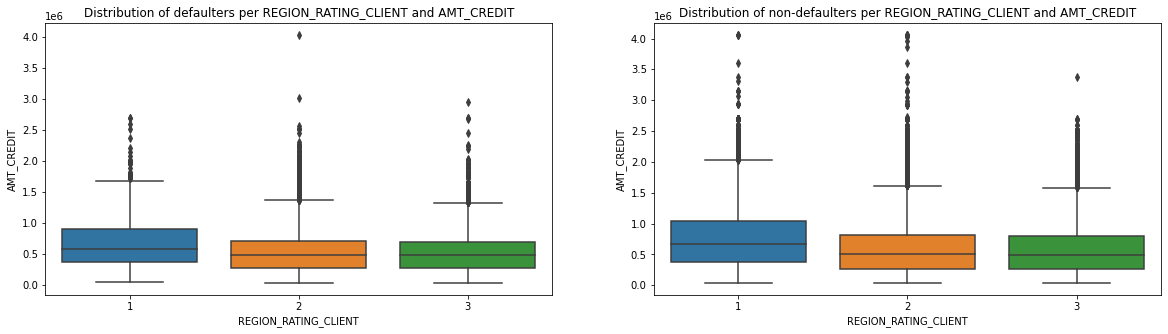

In [131]:
plotBoxPlot('REGION_RATING_CLIENT','AMT_CREDIT')

##### Inference: Rating of region where client leaves has some minor impact, more credit given to applicants where region rating is 1
Some outliers are seen.

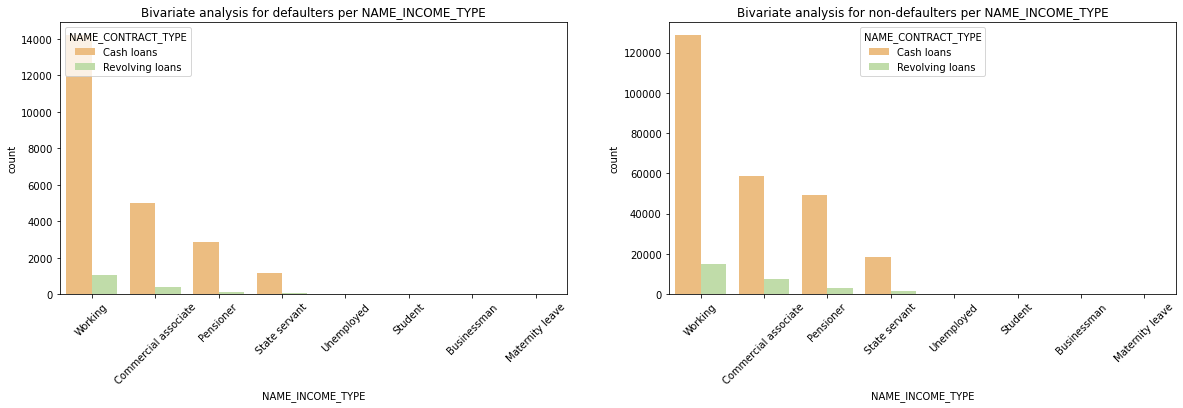

In [132]:
plotBiVariateCount('NAME_INCOME_TYPE','NAME_CONTRACT_TYPE')

##### Inference: More working applicants defaulted who has taken cash loans

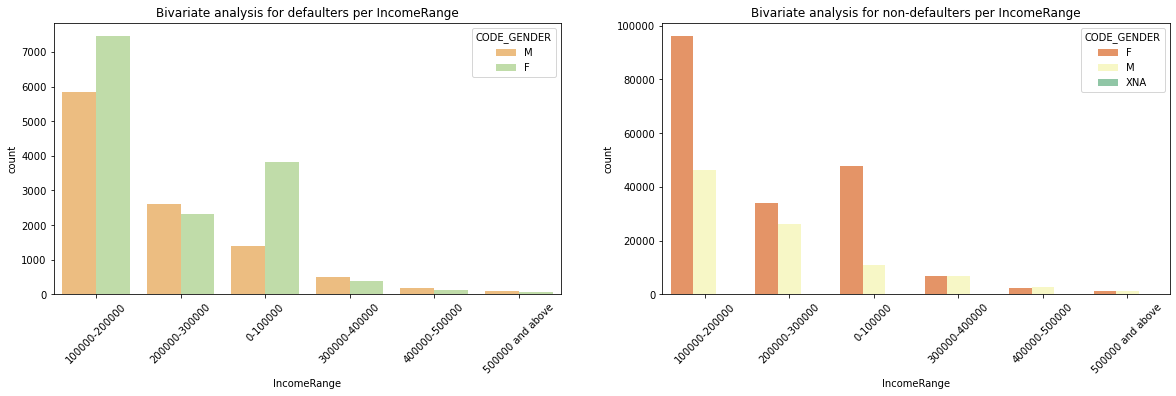

In [133]:
plotBiVariateCount('IncomeRange','CODE_GENDER')

##### Inference: Female income range as well as well as number of defaulters are higher especially income range 1 lakh to 2 lakhs

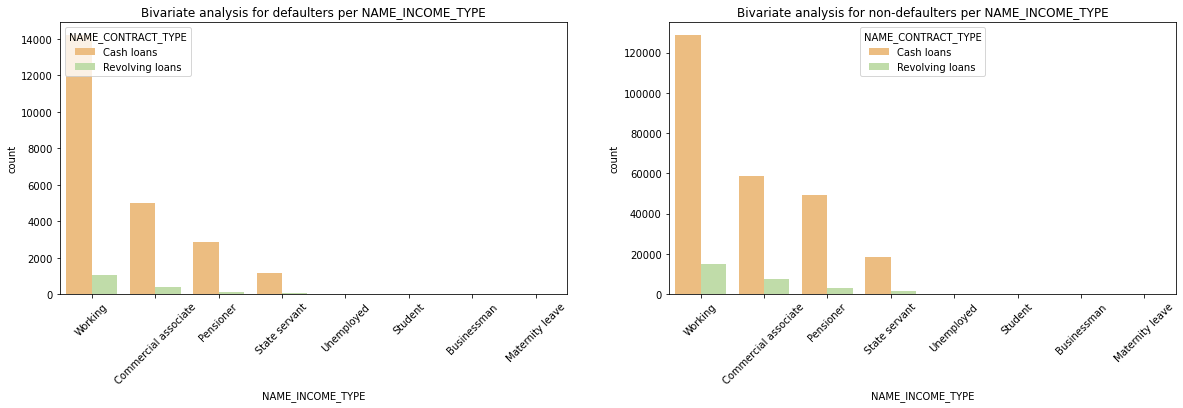

In [134]:
plotBiVariateCount('NAME_INCOME_TYPE','NAME_CONTRACT_TYPE')

##### In comparision to revolving loans many applicants who are working class goes for loan and maxiumn defaulters observed there who has opted for cash loans.

##### Bivariate analysis

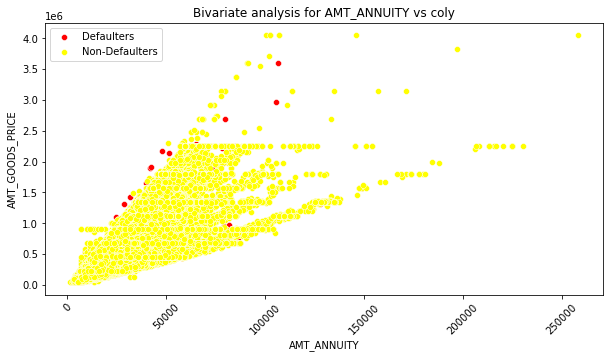

In [135]:
plotBiVariateNumericScatterPlotter('AMT_ANNUITY','AMT_GOODS_PRICE')

##### Amount good price and annuity amount are mostly correlated.

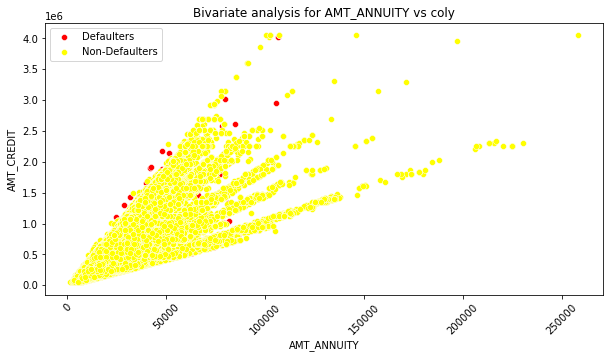

In [136]:
plotBiVariateNumericScatterPlotter('AMT_ANNUITY','AMT_CREDIT')

##### Amount credit and annuity amount are mostly correlated.

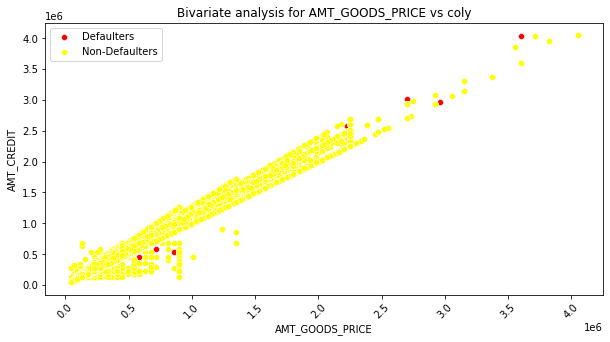

In [137]:
plotBiVariateNumericScatterPlotter('AMT_GOODS_PRICE','AMT_CREDIT')

##### Amount credit and amount good price are mostly correlated.

In [138]:
df_ad_Target1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   24825 non-null  int64   
 1   TARGET                       24825 non-null  int64   
 2   NAME_CONTRACT_TYPE           24825 non-null  object  
 3   CODE_GENDER                  24825 non-null  object  
 4   FLAG_OWN_CAR                 24825 non-null  object  
 5   FLAG_OWN_REALTY              24825 non-null  object  
 6   CNT_CHILDREN                 24825 non-null  int64   
 7   AMT_INCOME_TOTAL             24825 non-null  float64 
 8   AMT_CREDIT                   24825 non-null  float64 
 9   AMT_ANNUITY                  24825 non-null  float64 
 10  AMT_GOODS_PRICE              24804 non-null  float64 
 11  NAME_TYPE_SUITE              24755 non-null  object  
 12  NAME_INCOME_TYPE             24825 non-null  object  
 13  

### Coreelation metrics

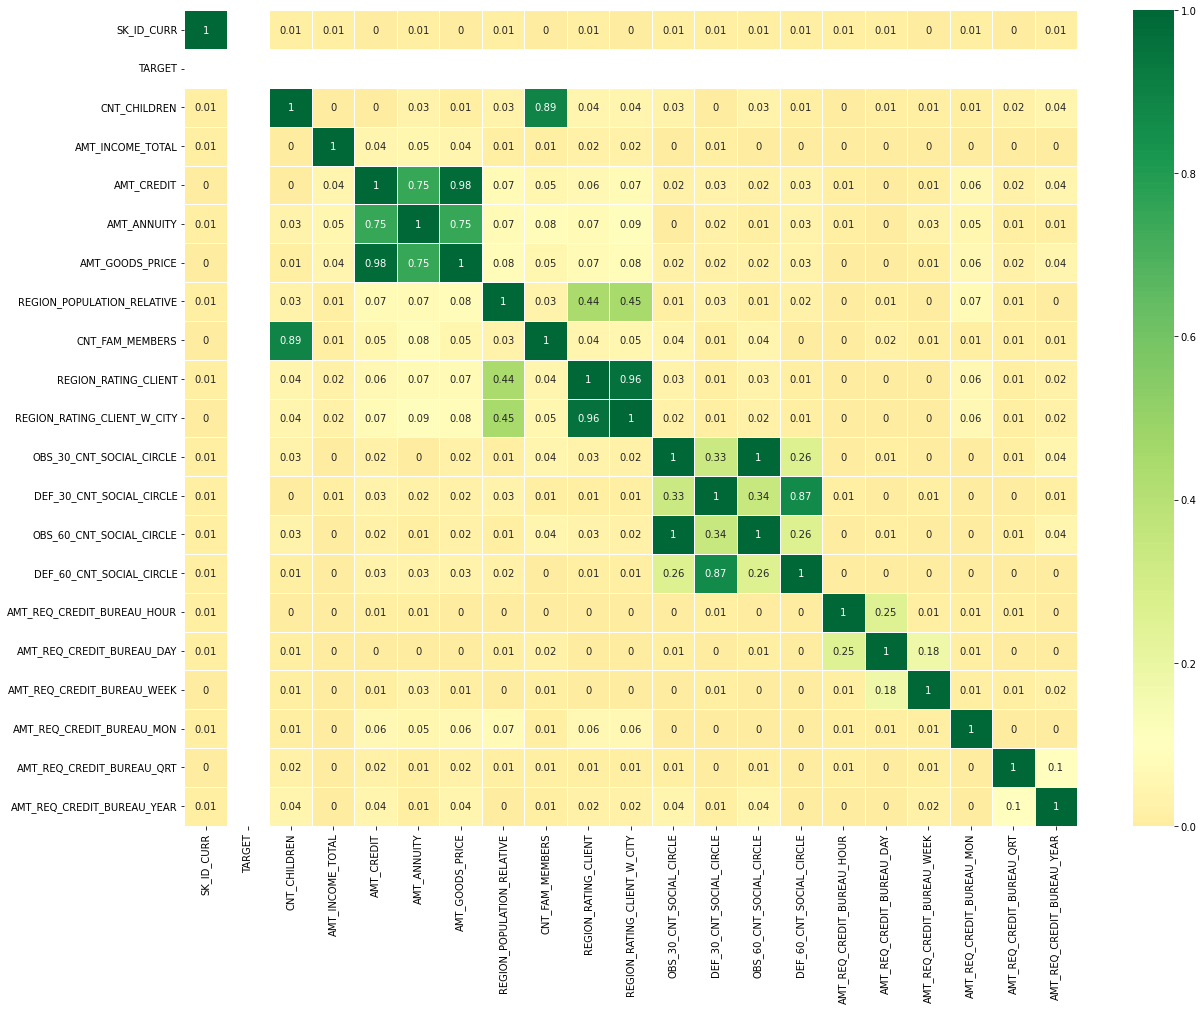

In [428]:
fig = plt.figure(figsize=(20,15))
corr = df_ad_Target1.corr().abs().round(2)
sns.heatmap(data=corr ,linewidths=.5,center=0.1,cmap='RdYlGn',annot= True)
plt.show()

##### Inference: Most correlated attributes are following:
        1) Loan annuity and price of the good for which loan is given are mostly correlated.
        2) Rating of rfegion where client leaves with or without city into account are almost same (most corelated).
        3) Count of family members and count of children are mostly correlated
        4) cleints social surroundings observable 30 days past due is almost correalted to defaulted 60 days past due
        Also plotted pairplot to observe the same correlation found in above heatmap.

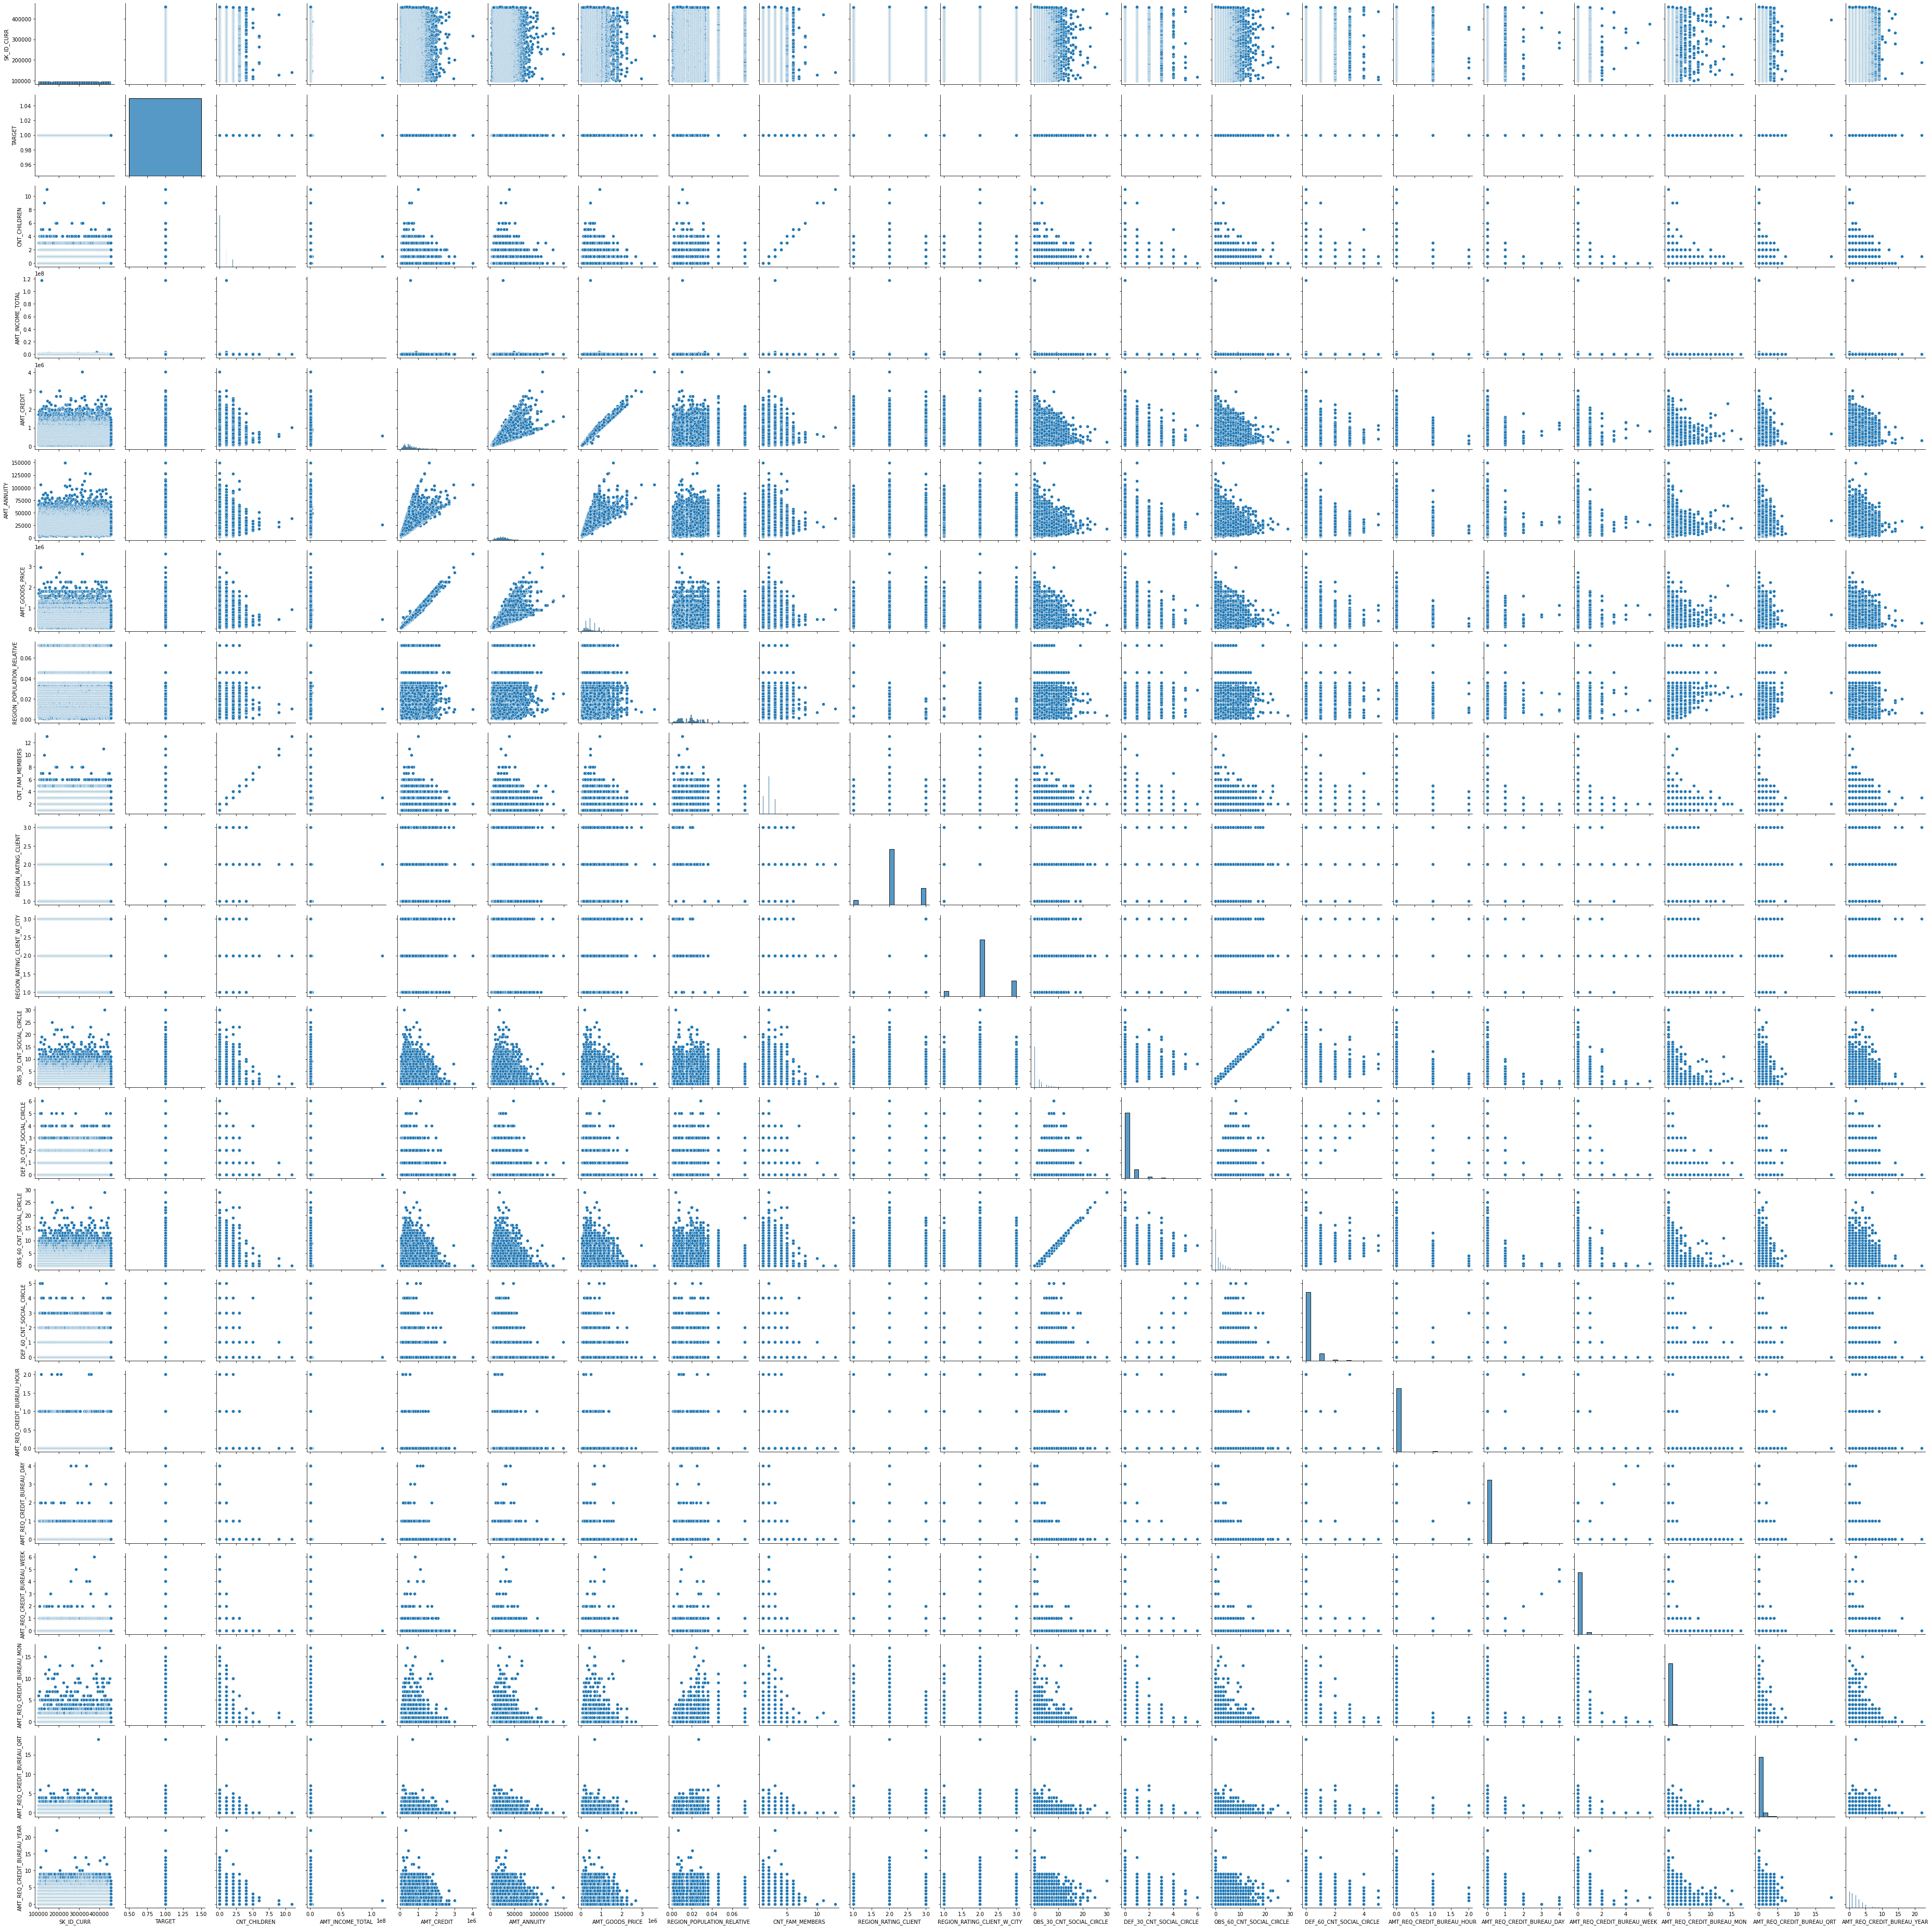

In [454]:
# pairplot with hue sex
sns.pairplot(df_ad_Target1)

##### Analysis on Previous application data

In [139]:
df_pa = pd.read_csv("previous_application.csv")
df_pa.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


##### Data Inspection (Routine check for structure of data frame)

In [140]:
df_pa.shape #columns 37 and rows 1670214

(1670214, 37)

In [459]:
df_pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

###### Data Quality Check and missing values

In [141]:
#Find the percentage missing values
df_pa_nullcols =  round((df_pa.isnull().sum()/1670214)*100,2) #percentage 45 is kept as threshold
df_pa_nullcols[df_pa_nullcols>40][:] #40 columns can be dropped

AMT_DOWN_PAYMENT             53.64
RATE_DOWN_PAYMENT            53.64
RATE_INTEREST_PRIMARY        99.64
RATE_INTEREST_PRIVILEGED     99.64
NAME_TYPE_SUITE              49.12
DAYS_FIRST_DRAWING           40.30
DAYS_FIRST_DUE               40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_LAST_DUE                40.30
DAYS_TERMINATION             40.30
NFLAG_INSURED_ON_APPROVAL    40.30
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

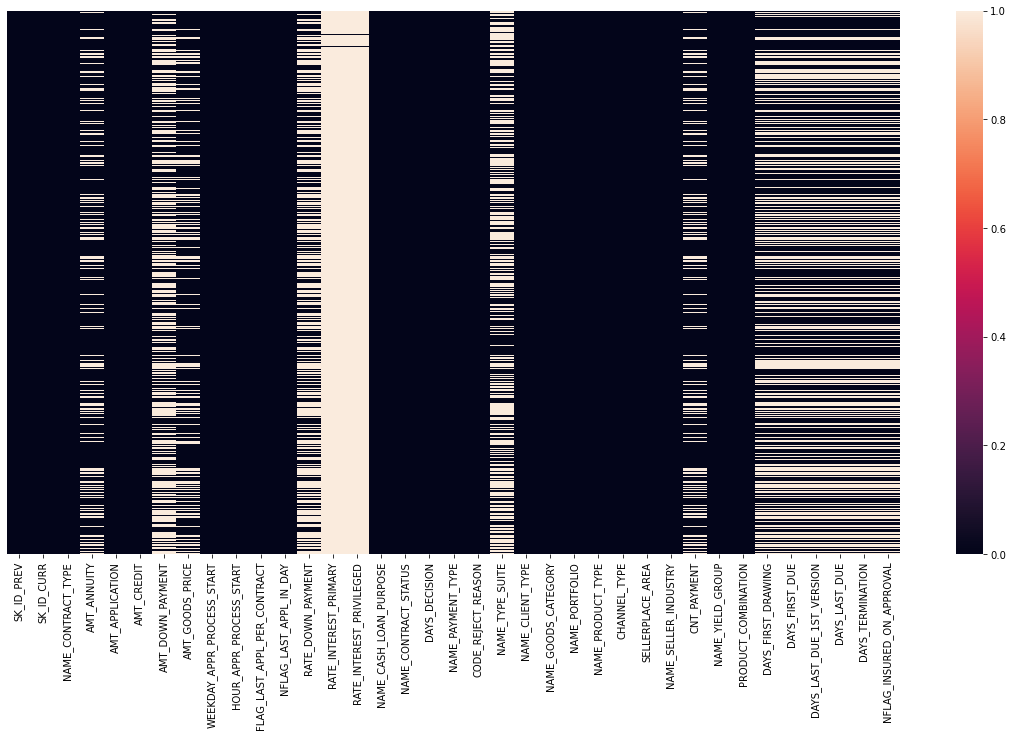

In [461]:
plt.figure(figsize=(20,10))
sns.heatmap(df_pa.isnull(),yticklabels=False)
plt.show

##### Remove columns with high percentage missing values (40 % higher) 

In [142]:
df_pa_missingcols_40 = pd.DataFrame({'Columns': df_pa_nullcols[df_pa_nullcols>40][:].index})
df_pa.drop(df_pa_missingcols_40.Columns,axis=1,inplace=True)

In [143]:
df_pa.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [144]:
df_pa_nullcols[(df_pa_nullcols>0) & (df_pa_nullcols<40)][:] 

AMT_ANNUITY            22.29
AMT_GOODS_PRICE        23.08
CNT_PAYMENT            22.29
PRODUCT_COMBINATION     0.02
dtype: float64

##### Treatment for NULL values in columns

##### Checking numerical attributes if they have outliers accordingly suggest imputation techniques
<hr/>

<AxesSubplot:xlabel='AMT_ANNUITY'>

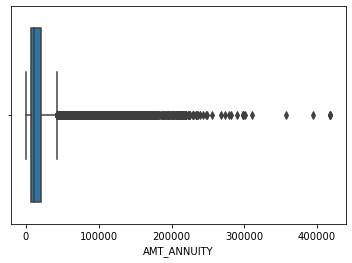

In [145]:
sns.boxplot(df_pa.AMT_ANNUITY) # to view the distribution to check whether any outliers

###### 
Suggestions: AMT_ANNUITY has outliers and that is the reason we should be using median value for imputation (since it has outliers use of mean will be biased towards outliers)


<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

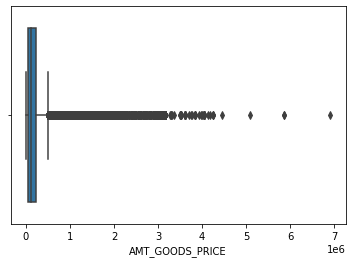

In [146]:
sns.boxplot(df_pa.AMT_GOODS_PRICE) # to view the distribution to check whether any outliers

##### 
Suggestions: AMT_GOODS_PRICE has outliers and that is the reason we should be using median value for imputation (since it has outliers use of mean will be biased towards outliers)

<AxesSubplot:xlabel='CNT_PAYMENT'>

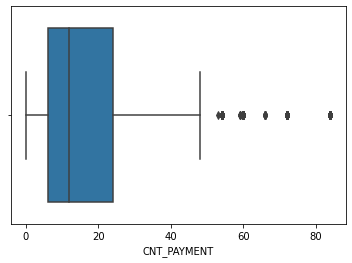

In [147]:
sns.boxplot(df_pa.CNT_PAYMENT) # to view the distribution to check whether any outliers

##### 
Suggestions: CNT_PAYMENT has outliers and that is the reason we should be using median value for imputation (since it has outliers use of mean will be biased towards outliers)

In [148]:
df_pa[df_pa.PRODUCT_COMBINATION.isnull() == True]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
6664,2515161,222844,XNA,NaN,0.0,0.0,NaN,SATURDAY,8,Y,1,XAP,Canceled,-351,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,10,Connectivity,NaN,XNA,NaN
9029,1851920,417884,XNA,NaN,0.0,0.0,NaN,MONDAY,13,Y,1,XAP,Canceled,-291,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,30,Connectivity,NaN,XNA,NaN
17038,2389511,148922,XNA,NaN,0.0,0.0,NaN,TUESDAY,6,Y,1,XAP,Canceled,-395,XNA,XAP,New,XNA,XNA,XNA,Country-wide,20,Connectivity,NaN,XNA,NaN
24543,2494449,366626,XNA,NaN,0.0,0.0,NaN,WEDNESDAY,13,Y,1,XAP,Canceled,-418,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,41,Connectivity,NaN,XNA,NaN
24574,2781877,394843,XNA,NaN,0.0,0.0,NaN,SATURDAY,6,Y,1,XAP,Canceled,-601,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,42,Connectivity,NaN,XNA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657486,2838749,146575,XNA,NaN,0.0,0.0,NaN,TUESDAY,13,Y,1,XAP,Canceled,-299,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,30,Connectivity,NaN,XNA,NaN
1657679,1611754,399463,XNA,NaN,0.0,0.0,NaN,THURSDAY,13,Y,1,XAP,Canceled,-311,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,50,Connectivity,NaN,XNA,NaN
1663138,1454073,371533,XNA,NaN,0.0,0.0,NaN,TUESDAY,10,Y,1,XAP,Canceled,-513,XNA,XAP,Refreshed,XNA,XNA,XNA,Country-wide,30,Connectivity,NaN,XNA,NaN
1663305,2441019,180201,XNA,NaN,0.0,0.0,NaN,SATURDAY,15,Y,1,XAP,Canceled,-570,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,81,Connectivity,NaN,XNA,NaN


##### 
Inference/suggestions: Most of the values like NAME_CONTRACT_TYPE, AMT_ANNUITY, CNT_PAYMENT, NAME_YIELD_GROUP and PRODUCT_COMBINATION are null. 
And these records also shows NAME_CONTRACT_STATUS is cancelled and hence we can delete these records 

##### Data quality check

In [149]:
df_pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [150]:
df_pa.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

##### 
Inference some XNA values exisis for NAME_CONTRACT_TYPE, we should keep it and classify as Other-Unknown instead of imputing with other values.

In [151]:
df_pa.FLAG_LAST_APPL_PER_CONTRACT.value_counts()

Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

In [152]:
df_pa.NFLAG_LAST_APPL_IN_DAY.value_counts()

1    1664314
0       5900
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64

In [153]:
df_pa.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

##### 
Inference/suggestions for NAME_CASH_LOAN_PURPOSE: There are many records with XNA values and hence we should ignore this column for analysis

In [154]:
df_pa.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [155]:
df_pa.DAYS_DECISION.value_counts()

-245     2444
-238     2390
-210     2375
-273     2350
-196     2315
         ... 
-2882     163
-2922     162
-2921     158
-2902     148
-1          2
Name: DAYS_DECISION, Length: 2922, dtype: int64

##### 
DAYS_DECISION values are negative, hence we should make it positive by using absolute function


In [156]:
df_pa.DAYS_DECISION = df_pa.DAYS_DECISION.abs()

In [157]:
df_pa.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

##### 
Inference/Suggestions: There are many records with XNA value, we should ignore this column for analysis

In [158]:
df_pa.CODE_REJECT_REASON.value_counts()

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

In [159]:
df_pa.NAME_CLIENT_TYPE.value_counts()

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

##### 
Inference/suggestions: This is a categorical variable which has invalid value as XNA. This should be ignored and can be categorized as Unknown.

In [160]:
df_pa.NAME_GOODS_CATEGORY.value_counts()

XNA                         950809
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
House Construction               1
Name: NAME_GOODS_CAT

##### 
Inference/suggestions: This is a categorical variable which has many invalid value as XNA. It would be better to ignore it for analysis

In [161]:
df_pa.NAME_PORTFOLIO.value_counts()

POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

##### 
Inference/suggestions: This is a categorical variable which has invalid value as XNA. This should be ignored and can be categorized as Unknown.

In [162]:
df_pa.NAME_PRODUCT_TYPE.value_counts()

XNA        1063666
x-sell      456287
walk-in     150261
Name: NAME_PRODUCT_TYPE, dtype: int64

##### 
Inference/suggestions: This is a categorical variable which has many invalid value as XNA. It would be better to ignore it for analysis

In [163]:
df_pa.CHANNEL_TYPE.value_counts()

Credit and cash offices       719968
Country-wide                  494690
Stone                         212083
Regional / Local              108528
Contact center                 71297
AP+ (Cash loan)                57046
Channel of corporate sales      6150
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64

In [164]:
df_pa.SELLERPLACE_AREA.value_counts()

-1       762675
 0        60523
 50       37401
 30       34423
 20       33840
          ...  
 1014         1
 1256         1
 677          1
 7518         1
 1446         1
Name: SELLERPLACE_AREA, Length: 2097, dtype: int64

##### 
Observation/suggestions: Selling area for seller place cannot be negative and there are many such records are there which need to be fixed / we need to apply absolute function

In [165]:
df_pa.SELLERPLACE_AREA = df_pa.SELLERPLACE_AREA.abs()

In [166]:
df_pa.NAME_SELLER_INDUSTRY.value_counts()

XNA                     855720
Consumer electronics    398265
Connectivity            276029
Furniture                57849
Construction             29781
Clothing                 23949
Industry                 19194
Auto technology           4990
Jewelry                   2709
MLM partners              1215
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64

##### 
Inference/suggestions for NAME_SELLER_INDUSTRY: This is a categorical variable which has many invalid value as XNA. It would be better to ignore it for analysis

In [167]:
df_pa.NAME_YIELD_GROUP.value_counts()

XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64

##### 
Inference/suggestions for NAME_YIELD_GROUP: This is a categorical variable which has many invalid value as XNA. It would be better to ignore it for analysis

In [168]:
df_pa.PRODUCT_COMBINATION.value_counts() # this seems to be having good data for analysis

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [169]:
df_pa.shape

(1670214, 26)

In [170]:
#We are interested to analyze previous applications for live applications.
#We need to analyze risk associated for those applications whose credit history available
df = pd.merge(left=df_ad,right=df_pa,how='inner',on='SK_ID_CURR')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AgeCategory,ExpCategory,IncomeRange,CreditRange,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,Laborers,1.0,2,2,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0-30,0-10,200000-300000,400000-500000,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,Core staff,2.0,1,1,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40-50,0-10,200000-300000,900000 and above,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,Core staff,2.0,1,1,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40-50,0-10,200000-300000,900000 and above,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,Core staff,2.0,1,1,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40-50,0-10,200000-300000,900000 and above,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,Laborers,1.0,2,2,Government,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50-60,0-10,0-100000,0-200000,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [171]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'AgeCategory', 'ExpCategory', 'IncomeRange', 'CreditRange',
       'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y', 'AMT_ANNUITY_y',
       'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y'

##### Univariate analysis of prev history of the current applicants (merged data frame)

In [172]:
def PlotUnivariateMergeDataSet(coly,colhue):
    plt.figure(figsize=(10,15))
    plt.xticks(rotation=45)
    plt.xscale('log')
    plt.title('Distribution of ' + coly + ' Vs ' + colhue)
    sns.countplot(data = df, 
                       y= coly, 
                       order=df[coly].value_counts().index,
                       hue = colhue,palette='Spectral')
    plt.show()

In [173]:
def PlotUnivariateBarPlotMergeDataSet(colx,coly,colhue):
    plt.figure(figsize=(10,15))
    plt.xticks(rotation=45)
    plt.title('Distribution of ' + colx + ' AND ' + coly)
    sns.barplot(data = df, 
                       y= coly, 
                       x= colx,
                       order=df[coly].value_counts().index,
                       hue = colhue,palette='Spectral')
    plt.show()

In [174]:
def plotbarchartspyvotdata(colx,coly):
    df_n = df.pivot_table(values='SK_ID_CURR',index=colx,columns=coly,aggfunc='count')
    df_n=df_n.div(df_n.sum(axis=1),axis='rows')*100
    df_n.plot(kind='bar',figsize=(10,5))
    plt.xticks(rotation=0)
    plt.xlabel(colx)
    plt.ylabel(coly)
    plt.title('Effect Of ' + coly + ' on Loan deafult')
    plt.show()

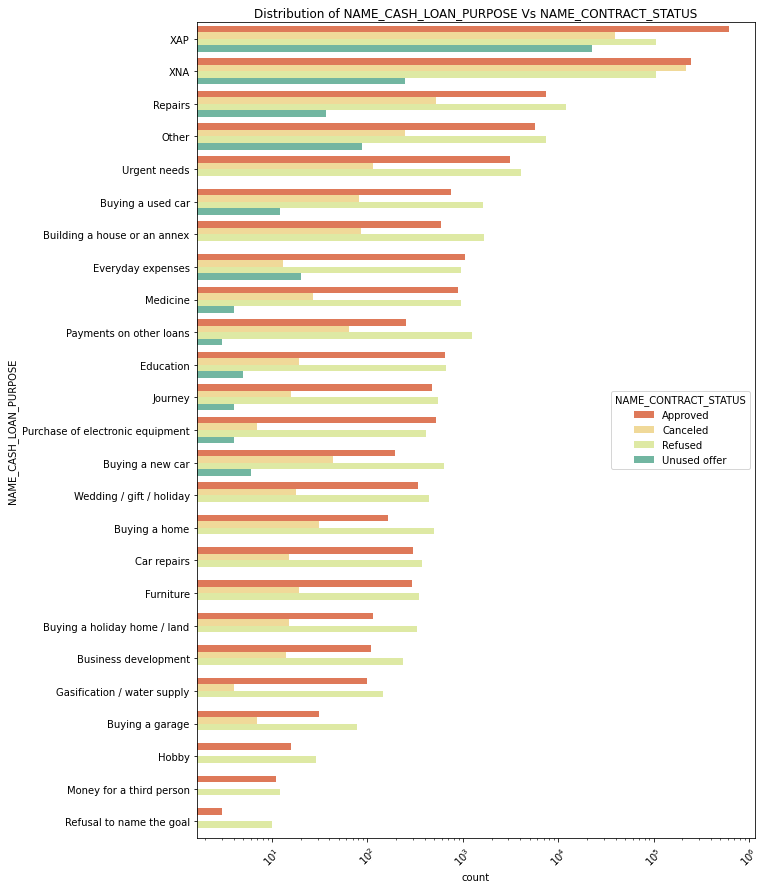

In [175]:
PlotUnivariateMergeDataSet('NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS')

##### Inference: 
In case of following cash loan purposes there are more rejection is seen then approval.    
Repairs, buying used car, payment on other loans, buying a new car, buying home, buying a garage

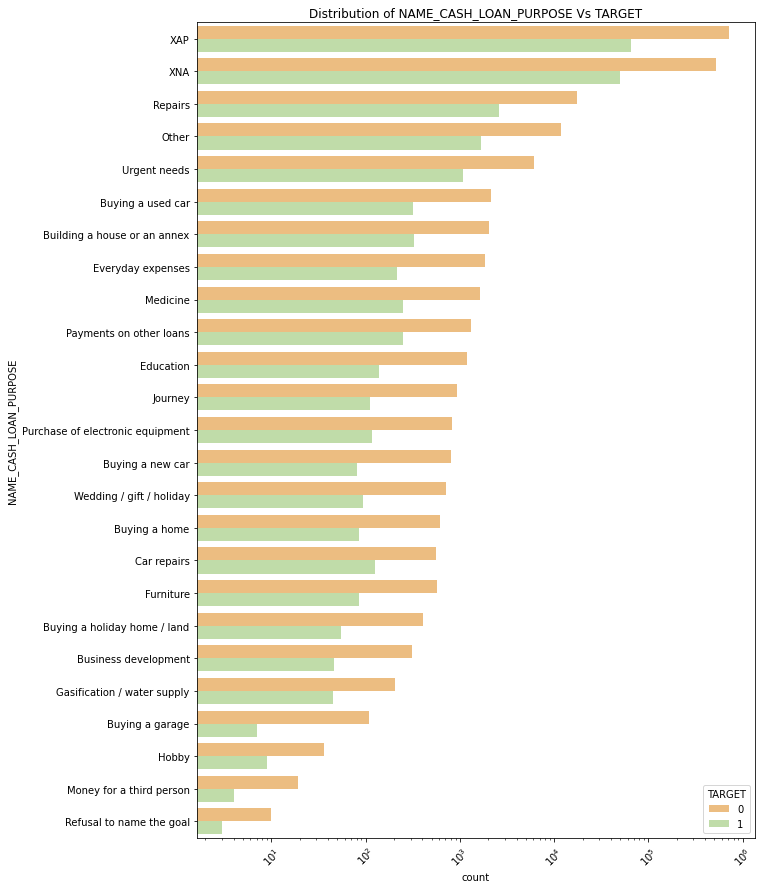

In [176]:
PlotUnivariateMergeDataSet('NAME_CASH_LOAN_PURPOSE', 'TARGET')

##### 
Inference: Loan history of Repairs are having more difficulty in paying money and they become defaulters. 
Where as buying a garage, business development less likely to default.

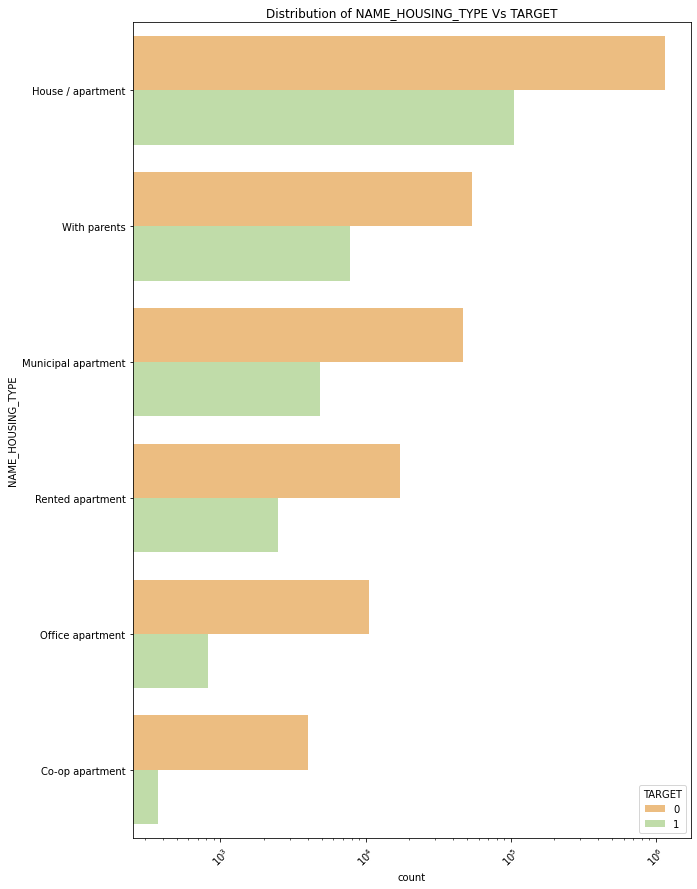

In [177]:
PlotUnivariateMergeDataSet('NAME_HOUSING_TYPE', 'TARGET')

In [178]:
df['NAME_HOUSING_TYPE'].value_counts()

House / apartment      1264952
With parents             61614
Municipal apartment      51533
Rented apartment         19785
Office apartment         11428
Co-op apartment           4389
Name: NAME_HOUSING_TYPE, dtype: int64

##### Inference: Office apartment and co-op apartment loan applicants has less defaulters; where as house apartment has many applicants and defaulters as well

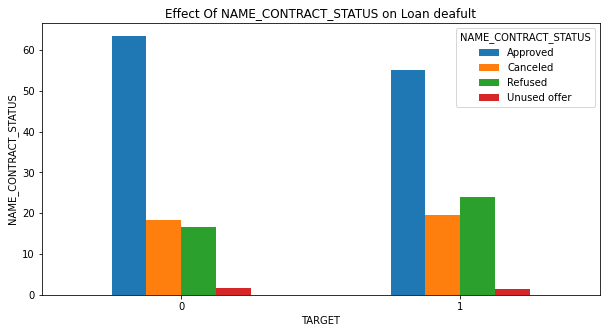

In [179]:
## Merging the two files to do some analysis
###df_n = pd.merge(df_ad, df_pa, how='left', on=['SK_ID_CURR'])

plotbarchartspyvotdata('TARGET','NAME_CONTRACT_STATUS')

##### Inference: 
    proportion of cancelled and refused loans in previous history; seen more defaulters in current application.
    proportion for approved loans in previous history has slight decline in default

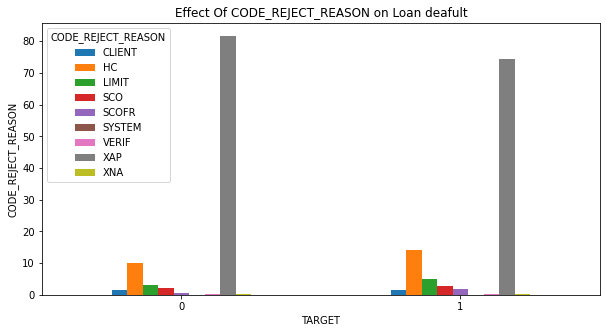

In [180]:
plotbarchartspyvotdata('TARGET','CODE_REJECT_REASON')

##### Inference:
    where previous application reject reason is HC there more default observed. XAP cases are approved cases where default is less observed

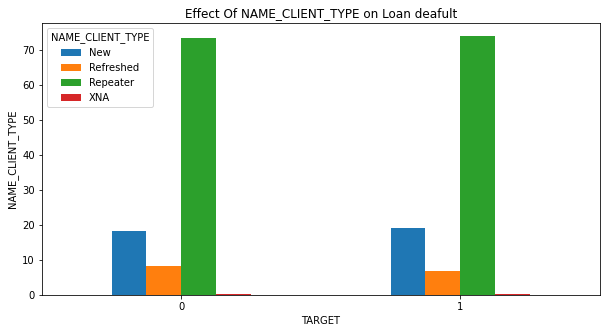

In [181]:
plotbarchartspyvotdata('TARGET','NAME_CLIENT_TYPE')

##### Inference:
    Repeater and new customer has same default rate
    Refreshed customer has seen to have less default

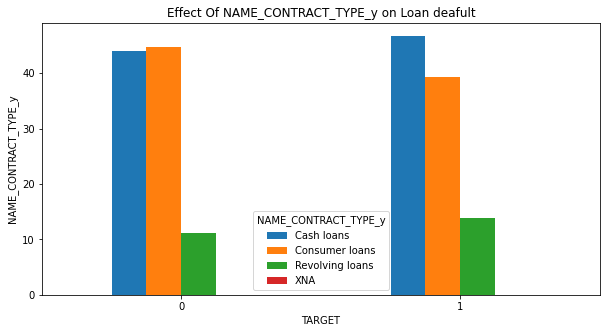

In [182]:
plotbarchartspyvotdata('TARGET','NAME_CONTRACT_TYPE_y')

##### Inference:
    Default in proportion of cash loans has slightly more.
    Default in priportion of consumer loans has slightly less.
    Default for proportion of revolving loan is slightly more.